# Extended Kalman Filter

Which word is most interesting (most informative)?
* [ ] extended
* [ ] kalman
* [x] filter

- Why filtering?
- Bayes filter
- (Extended) Kalman filter
- Dissanayake et. al. (2001), A solution to SLAM

# Why filtering?

_Not to be confused with filtering in the context of signal processing_

- deal with uncertainty (noise)
- model the robot's path as the state of a stochastic process
- estimate a sequence of states (and the map) against the noise

# Filtering

|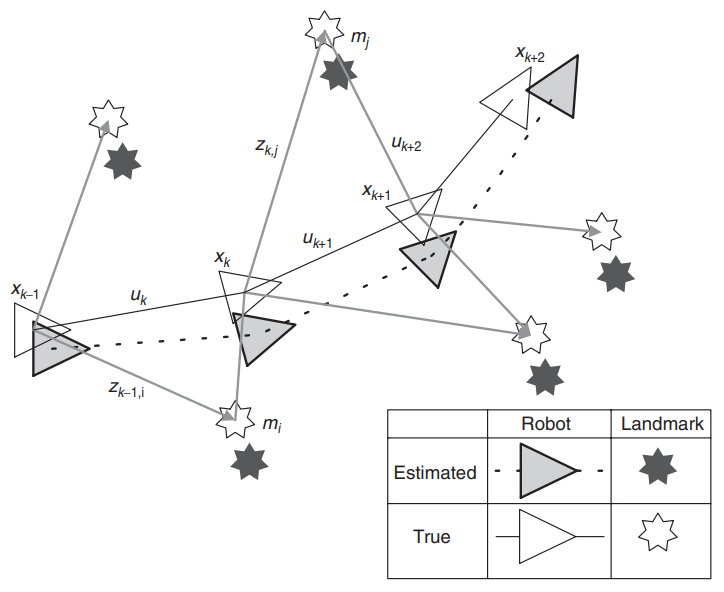|
|---|
| Durrant-Whyte, Hugh, and Tim Bailey. "Simultaneous localization and mapping: part I." IEEE robotics & automation magazine 13.2 (2006): 99-110.|

# Online SLAM
|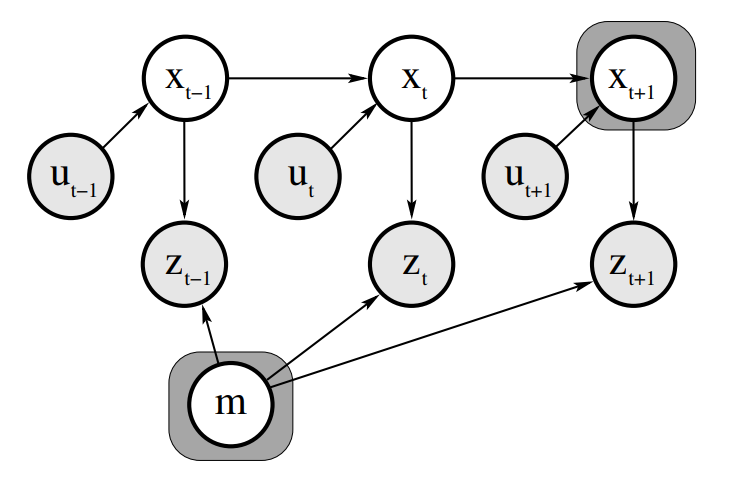|
|---|
|Thrun, Sebastian, Wolfram Burgard, and Dieter Fox. Probabilistic robotics. MIT press, 2005.|

- $x_t$: robot pose (transition and rotation) at time t 
- $u_t$: robot control
- $z_t$: robot observation
- $m$: landmarks (the map)
 
Online SLAM: Estimate $(x_{t+1}, m)$ given $x_{1:t}$, $u_{1:t+1}$ and $z_{1:t+1}$ 
 
**Quiz**: What is full SLAM?
 
Estimate $(x_{1:t+1}, m)$ given $u_{1:t+1}$ and $z_{1:t+1}$. It means that we could have access to the measurements in the future.

# Bayes Filter

We model the robot's state at time t and the map with a belief

$$
\begin{aligned}
bel(x_t) &= p(x_{t} | z_{1:t}, u_{1:t}) \\
         &= \eta p(z_t | x_{t}, z_{1:t-1}, u_{1:t}) p(x_{t}|z_{1:t-1},u_{1:t})
         \hookleftarrow \textrm{(conditioned) Bayes rule} \\
         &= \eta p(z_t | x_t) \underline{p(x_{t}|z_{1:t-1},u_{1:t})}
         \hookleftarrow \textrm{Total probability theorem} \\
         & \qquad\qquad\qquad \downarrow \textrm{Markov assumption} \\
         &= \eta p(z_t | x_t) \int_{x_{t-1}} \underline{p(x_t | x_{t-1}, z_{1:t-1}, u_{1:t})} p(x_{t-1} | z_{1:t-1}, u_{1:t}) dx_{t-1} \\
         &  \qquad\qquad\qquad\qquad \downarrow \textrm{Markov assumption} \\
         &= \eta p(z_t | x_t) \int_{x_{t-1}} p(x_t | x_{t-1}, u_t) \underline{p(x_{t-1} | z_{1:t-1}, u_{1:t})} dx_{t-1} \\
         &  \qquad\qquad\qquad\qquad\qquad\qquad \downarrow x_{t-1} \textrm{ independent of future motion } u_t \\
         &= \eta p(z_t | x_{t}) \int_{x_{t-1}} p(x_t | x_{t-1}, u_t) \underline{bel(x_{t-1})} dx_{t-1}  \rightarrow \textrm{recursive term!}
\end{aligned}
$$

# Bayes Filter

The recursive update of belief
$$
bel(x_t) = \eta \ p(z_t | x_{t}) \int_{x_{t-1}} p(x_t | x_{t-1}, u_t) bel(x_{t-1}) dx_{t-1}
$$
- **Alert: changing of notation!** Here $x_t$ includes not only robot position and pose but also the map. From now on, $x_t$ would actually mean $(x_t, m)$ if not explicitly state otherwise.
- $\eta=\frac{1}{p(z_t\vert z_{1:t-1}, u_{1:t})}$ is the normalization term

# Bayes Filter


**Prediction step**

$$
\bar{bel}(x_t) = \int p(x_t \vert x_{t-1}, u_t) \ bel(x_{t-1}) dx_{t-1}
$$

where $p(x_t \vert x_{t-1}, u_t)$ is the _motion model_

**Correction step**

$$
bel(x_t) = \eta \ p(z_t \vert x_t) \ \bar{bel}(x_t)
$$

where $p(z_t \vert x_t)$ is the _observation model_

 - Bayes Filter is a recursive filter
 - In each iteration, follow the prediction step and then the correction step 

# Kalman Filter

- Assumption 1: Everyting is **linear**
- Assumption 2: Everything is **Gaussian**
- Property 1: Everything **stays** Gaussian

## Everyting is linear


- Linear motion model
$$
x_t = A_t x_{t-1} + B_t u_t + \epsilon_t
$$


- Linear observation model
$$
z_t = C_t x_t + \delta_t 
$$ 

- $A_t$ describes how the state evolves from t−1 to t without controls or noise
- $B_t$ describes how the motion $u_t$ changes the state from  t−1 to t
- $C_t$ describes how to map the state $x_t$ to an observation $z_t$
- $\epsilon_t$, $\delta_t$ are independent random variables representing the noise with zero mean and covariance $R_t$ and $Q_t$ respectively

## Everything is Gaussian

**Prediction step**

$$
\bar{bel}(x_t) = \int \underline{p(x_t \vert x_{t-1}, u_t)} \  \underline{bel(x_{t-1})} dx_{t-1}
$$

where $p(x_t \vert x_{t-1}, u_t)$ is the _motion model_

**Correction step**

$$
bel(x_t) = \eta \ \underline{p(z_t \vert x_t)} \ \bar{bel}(x_t)
$$

where $p(z_t \vert x_t)$ is the _observation model_

🌟 Besides, the motion noise $\epsilon_t \sim N(0, R_t)$ and observation noise $\delta_t \sim N(0, Q_t)$ are also assumed to be Gaussian 

## Everything stays Gaussian


**Prediction step**

$$
\underline{\bar{bel}(x_t)} = \int p(x_t \vert x_{t-1}, u_t) \ \underline{bel(x_{t-1})} dx_{t-1}
$$

where $p(x_t \vert x_{t-1}, u_t)$ is the _motion model_

**Correction step**

$$
\underline{bel(x_t)} = \eta \ p(z_t \vert x_t) \ \underline{\bar{bel}(x_t)}
$$

where $p(z_t \vert x_t)$ is the _observation model_

---

🌟 This propertry holds when everything is linear and everything is Gaussian

If we look at the prediction step and correction step again with the assumptions that everything is Gaussion and motion & observation model are linear.

- The prediction step becomes intuitively a linear transformation of the Gaussian distribution.
- The corrention step becomes nothing but a production of two Gaussian distributions, which is intuitively a weighted mean of the two Gaussians.

Well that's a bit of exageration because there's Gaussian noises

# Kalman Filter Algorithm

<sup>(Mathematical Derivation see Probabilistic Robotics Section 3.2.4)</sup>

Given previous state $x_{t-1} \sim N(\mu_{t-1}, \Sigma_{t-1})$, current control $u_t$ and current observation $z_t$,

---

**Prediction step**

$$
\bar \mu_t = A_t \mu_{t-1} + B_t u_t \\
\bar \Sigma_t = A_t \Sigma_{t-1} A_t^T + R_t
$$

**Correction step**

$$
\mu_t = \bar \mu_t + K_t (z_t - C_t \bar \mu_t ) \\
\Sigma_t = ( I - K_t C_t ) \bar \Sigma_t
$$

where $K_t = \bar \Sigma_t C_t^T ( C_t \bar \Sigma_t C_t^T + Q_t)^{-1} $ is called the **Kalman gain**. 

---

Return current state $x_t \sim N(\mu_t, \Sigma_t)$

### Prediction step


$$
\bar \mu_t = A_t \mu_{t-1} + B_t u_t \\
\bar \Sigma_t = A_t \Sigma_{t-1} A_t^T + R_t
$$

Prediction step is essentially applying a linear transformation, the motion model, to the previous belief, which is a multivariate normal random vector.

**Proposition** Let $X\sim N(\mu_X, \Sigma_X)$

$$
Y = AX + B
$$

Then $Y \sim N(\mu_Y, \Sigma_Y)$ where
$$
\mu_Y = A\mu_X + B \\
\Sigma_Y = A\Sigma_XA^T
$$

The only difference is the Gaussian noise $\epsilon_t \sim N(0, R_t)$ from the motion model

### Correction step


$$
\mu_t = \bar \mu_t + K_t (\underline{z_t - C_t \bar \mu_t}) \\
\Sigma_t = ( I - K_t C_t ) \bar \Sigma_t
$$

where $K_t = \bar \Sigma_t C_t^T ( C_t \bar \Sigma_t C_t^T + Q_t)^{-1} $ is called the **Kalman gain**. 

The correction step is essentially a production of two Gaussians and production of two Gaussians is intuitively a weighted mean of the two. The correction step is thus essentially a weighted mean of prediction and measurement. The weights are dependent of the measurement noise $Q_t$
   + If the observation noise $Q_t \rightarrow \infty $, then the Kalman gain $K_t \rightarrow ?$, 
$\mu_t \rightarrow ?$, $\Sigma_t \rightarrow ?$
   + If the observation noise  $Q_t \rightarrow 0 $, then the Kalman gain $K_t \rightarrow ?$, $\mu_t \rightarrow ?$, $\Sigma_t \rightarrow ?$


- $ C_t \bar \mu_t$ is the expected observation so $\upsilon_t = z_t - C_t \bar \mu_t $ (a.k.a. the innovation matrix) is difference between the expected and the actual observation
   + If the innovation $(z_t - C_t \bar \mu_t) \rightarrow 0$, $\mu_t \rightarrow \bar{\mu_t}$, i.e., the mean doesn't need to be corrected
- The weights are dependent of the measurement noise $Q_t$
   + If $Q_t \rightarrow \infty $, then the Kalman gain $K_t \rightarrow 0$, 
$\mu_t \rightarrow \bar{\mu_t}$, $\Sigma_t \rightarrow \bar{\Sigma_t}$
, i.e., no correction to the prediction based on the measurement
   + If $Q_t \rightarrow 0 $, then the Kalman gain $K_t \rightarrow C_t^{-1}$, $\mu_t \rightarrow C_t^{-1} z_t$, $\Sigma_t \rightarrow 0$
, i.e., the measurement overrides prediction completely.

## Quiz

Which parts are updated during the prediction step?
$$
\mu = 
\begin{pmatrix}
x \\
m \\
\end{pmatrix}
,
% <![CDATA[
\Sigma = 
\begin{pmatrix}
\Sigma_{xx} & \Sigma_{xm} \\
\Sigma_{mx} & \Sigma_{mm} \\
\end{pmatrix} %]]>
$$

**Alert: changing of notation again!** Here $x$ denotes robot pose (translation and rotation) only and we drop the timestamp subscript t for convenience.


Hint: Assume static landmarks (map)

* [x] $x$
* [ ] $m$
* [x] $\Sigma_{xx}$
* [x] $\Sigma_{xm}$ / $\Sigma_{mx}$
* [ ] $\Sigma_{mm}$

## Bonus quiz

Which parts are updated during the prediction step?
$$
\mu = 
\begin{pmatrix}
x \\
m \\
\end{pmatrix}
,
% <![CDATA[
\Sigma = 
\begin{pmatrix}
\Sigma_{xx} & \Sigma_{xm} \\
\Sigma_{mx} & \Sigma_{mm} \\
\end{pmatrix} %]]>
$$

* [x] $x$
* [x] $m$
* [x] $\Sigma_{xx}$
* [x] $\Sigma_{xm}$ / $\Sigma_{mx}$
* [x] $\Sigma_{mm}$

# Initialization

The Kalman filter algorithm tells that, given a previous state, we can estimate the next state. That means we can estimate the state sequence recursively starting from an initial belief.

🌟 Question: How to find the initial belief?

$$
\mu_0 = 
\begin{pmatrix}
0 \\
0 \\
\end{pmatrix}
,
% <![CDATA[
\Sigma_0 = 
\begin{pmatrix}
0 & 0 \\
0 & \infty I \\
\end{pmatrix} %]]>
$$

It turns out that, in many cases<sup>1</sup>, we can simply initialize the belief with infinity variance for the landmarks and $0$s elsewhere.

## Initialization 

🌟 Question: Why 0s?

- $x=0$: It's just convenient to set where the robot starts as the origin.
- $m=0$: The landmarks are relative to the robot's initial pose and will be corrected as new observations being made.  
- $\Sigma_{xx}=0$ and $\Sigma_{xm}$/$\Sigma_{mx}=0$: Since we set where the robot starts as the origin, we are completely certain about the robots position

[1] If the measurements are too noisy then surely better initialization helps


🌟 Question: Why can't we initialize $\Sigma_{mm}$ with 0s?

Dissanayake et. al. (2001) Theorem 1 

# Extended Kalman Filter

Non-linearity breaks **Property 1: Everything stays Gaussian!**

| linear | non-linear |
|----|----|
| ![image.png](https://www.dropbox.com/s/0cg5igor2r9zvpx/linear_func.png?dl=1) | ![image.png](https://www.dropbox.com/s/b9s0u69lygnnnji/non_linar_func.png?dl=1) |
| Courtesy of Cyrill Stachniss |

# Extended Kalman Filter

Non-linear model example: standard odometry model (2D)

| | |
|---|---|
| ![image.png](https://www.mrpt.org/wp-content/uploads/2010/08/Motion_model_thrun.png) | 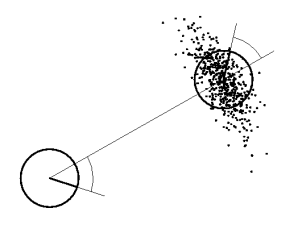 |
| Courtesy of www.mrpt.org | Courtesy of  Cyrill Stachniss |

# Extended Kalman Filter

Assumption 1<sup>\*</sup>: both motion model and observation model are linear in the local neighborhood so that we can apply first-order Tayler expansion around the state's mean  

- linear models 
$$
x_t = A_t x_{t-1} + B_t u_t + \epsilon_t \\
z_t = C_t x_t + \delta_t
$$ 

- non-linear models 
$$
x_t = g(x_{t-1}, u_t) + \epsilon_t \approx g(\mu_{t-1}, u_t) + G_t(x_{t-1} - \mu_{t-1}) + \epsilon_t  \\
z_t = h(x_t) + \delta_t \approx h(\bar{\mu}_t) + H_t(x_t - \bar{\mu}_t) + \delta_t
$$

🌟 Compare the two, the main difference is: $A_t \Leftrightarrow G_t, C_t \Leftrightarrow H_t$

where $G_t = \frac{\partial g(u_t, \mu_{t-1})}{\partial x_{t-1}}
$, $H_t = \frac{\partial h(\bar{\mu}_t)} {\partial x_t}
$ are the Jocobian matrices and they need to be re-computed each step

Remind that $x_t \sim N(\mu_t, \Sigma_t)$

# Dissanayake et. al. (2001), A solution to the SLAM problem

Assumptions:

- Everything is linear and everything is Gaussian
- The car stands still and there is no motion noise $Q=0$
- In the limit of infinite observations so the noise cancelled out

# Dissanayake et. al. (2001), A solution to the SLAM problem

> Theorem 1: The determinant of any submatrix of the map
covariance matrix decreases monotonically as successive observations are made.

Indicates that the diagonal of $\Sigma_{mm}$ decrease monotonically



$$
\sigma_{ii}^2(t+1) \leq \sigma_{ii}^2 (t)
$$

# Dissanayake et. al. (2001), A solution to the SLAM problem


> Theorem 2: In the limit the landmark estimates become fully
correlated.

Indicates the given the position of one landmark, then the relative positions of the rest of the landmarks are know with complete certainty.

Note that there is still uncertainty in the absolute position, which leads to Theorem 3:

# Dissanayake et. al. (2001), A solution to the SLAM problem

> Theorem 3: In the limit, the lower bound on the covariance matrix associated with any single landmark estimate is determined only by the initial covariance in the vehicle estimate at the time of the first sighting of the first landmark.

# Take-home

- A quick walk-through of Bayes Filter
- Assumptions made in the Kalman Filter
- Intuition of the Kalman Filter algorithm
- How to initialize (Extended) Kalman filter
- The dynamics of Kalman Filtering